## Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('xAPI-Edu-Data.csv')

In [3]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [19]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [5]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [6]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


### Q.1 Visualize just the categorical features individually

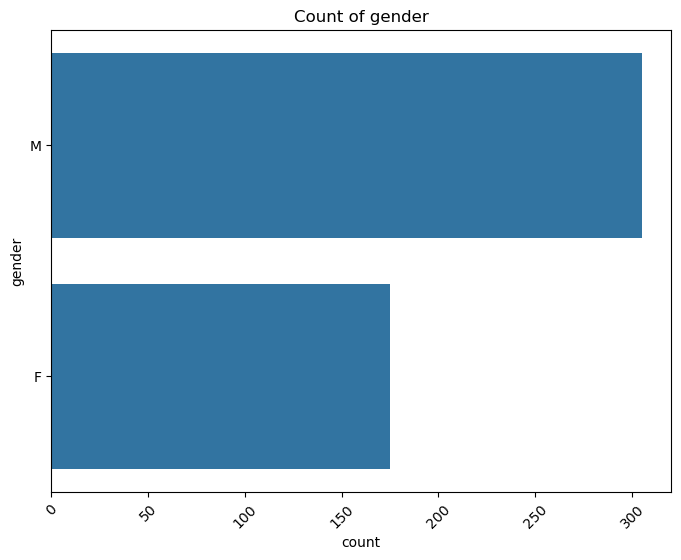

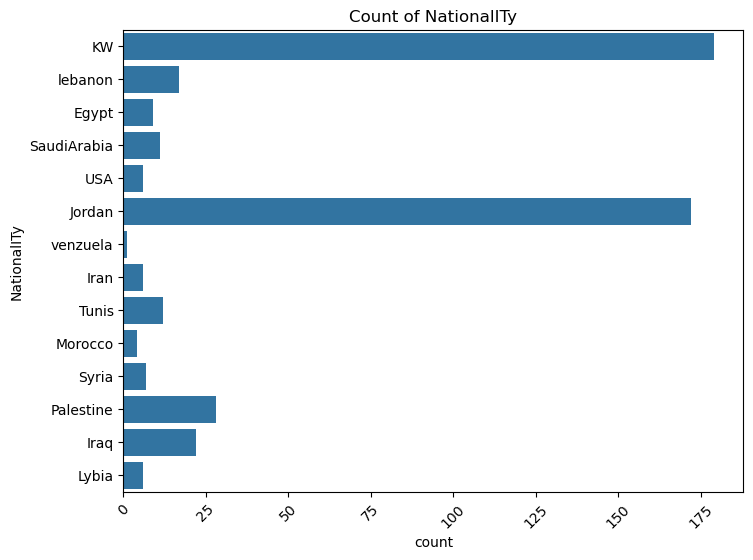

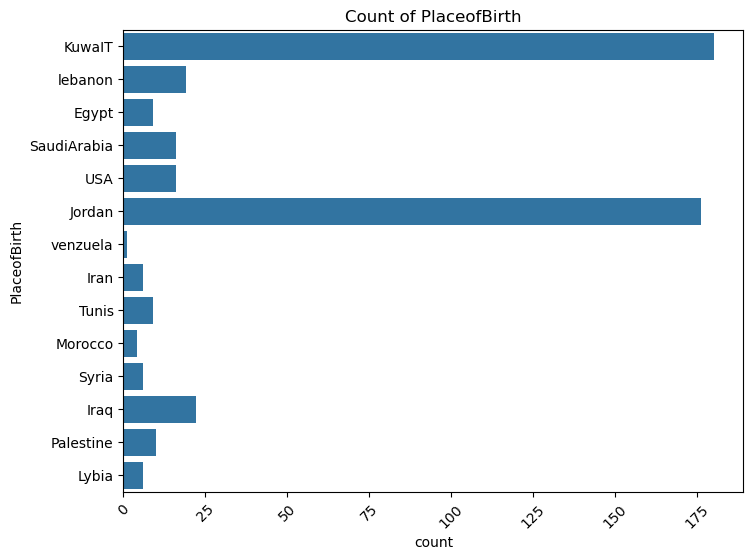

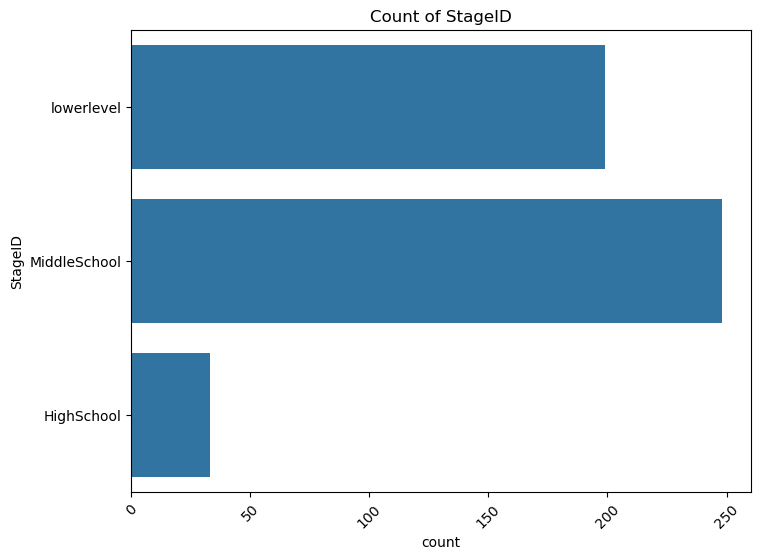

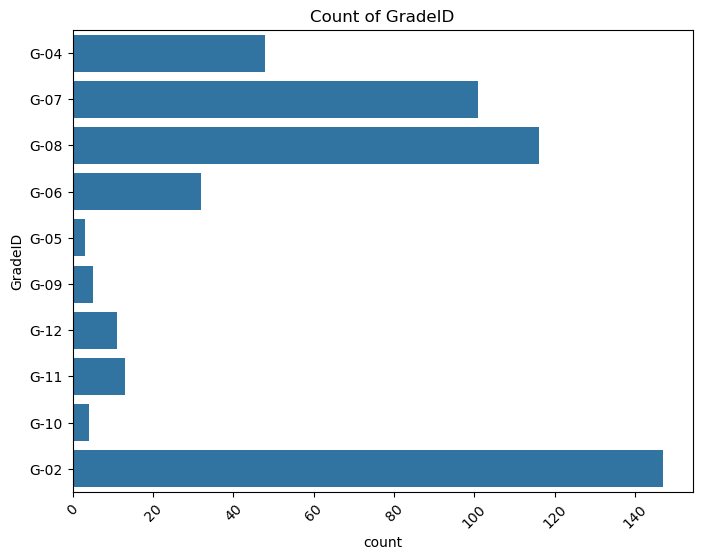

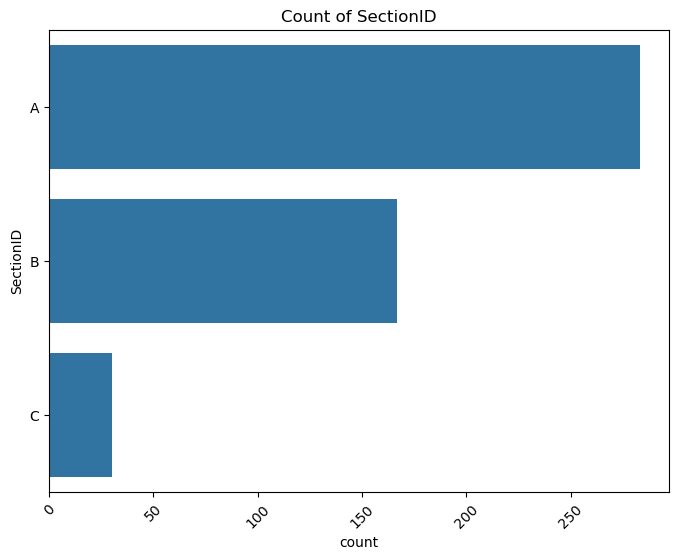

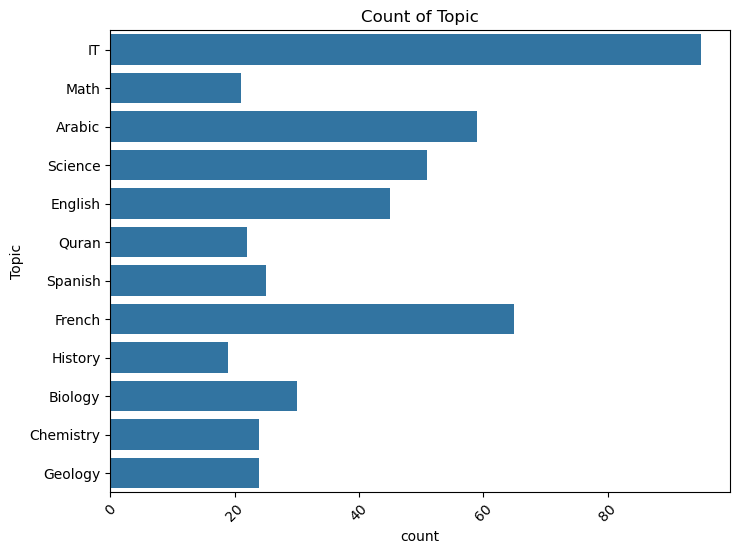

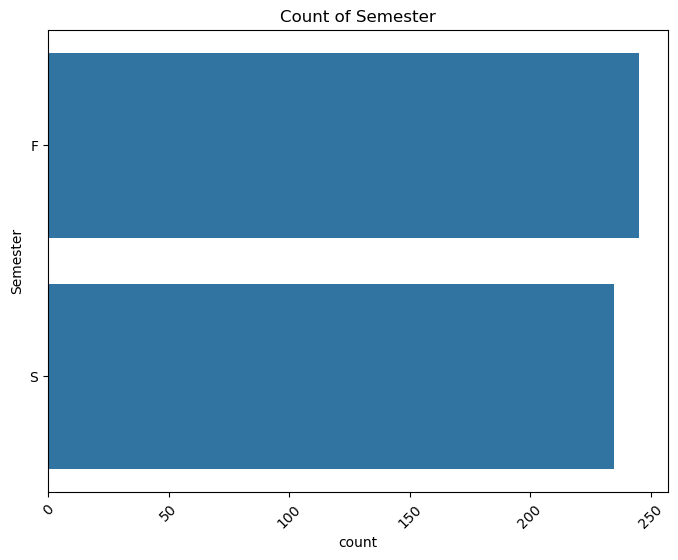

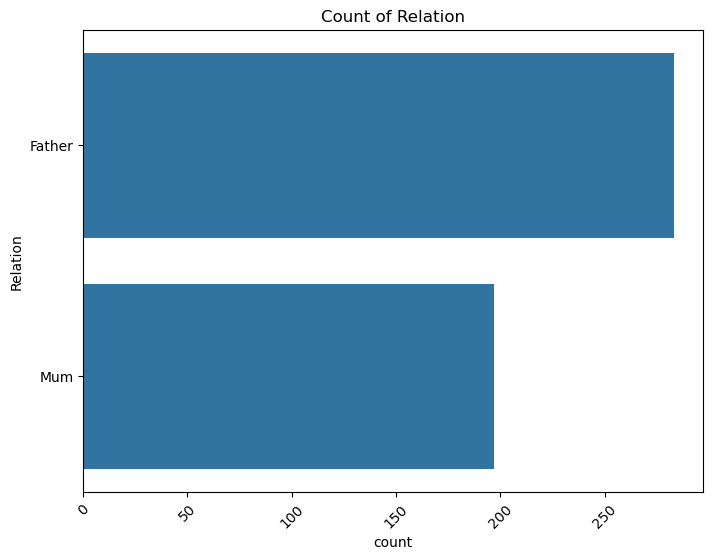

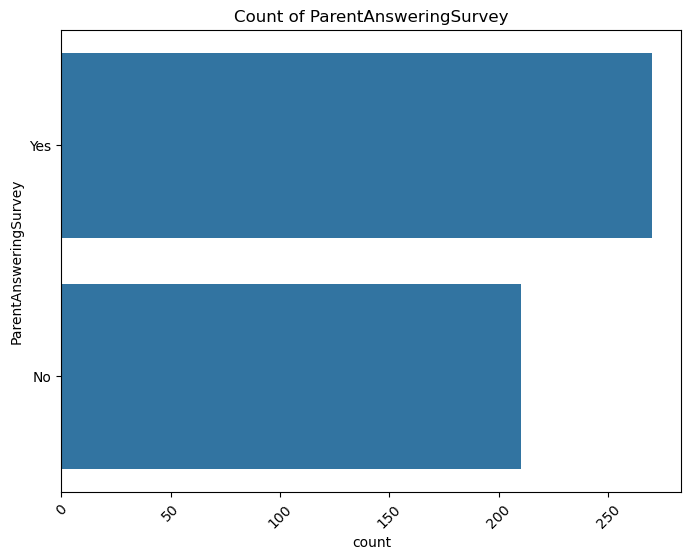

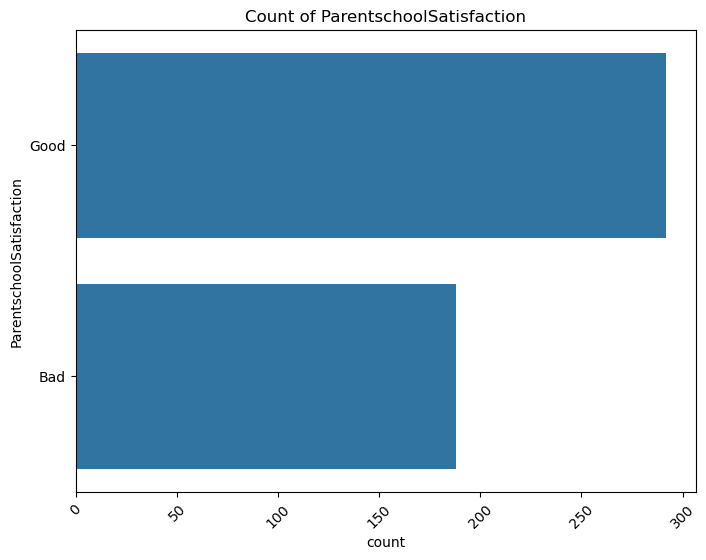

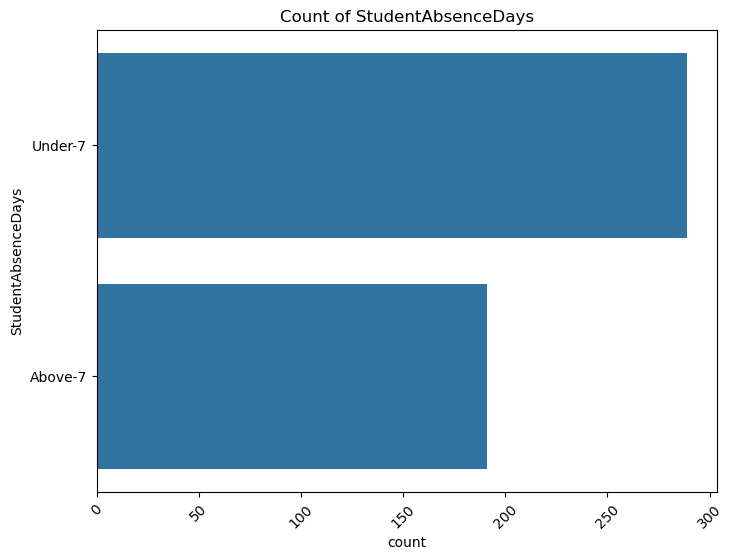

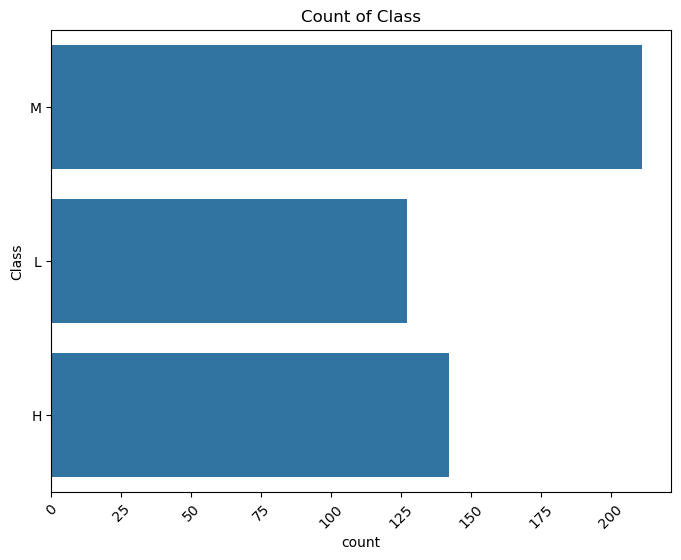

In [23]:

categorical_features = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 
                        'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 
                        'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(df[feature])
    plt.title(f"Count of {feature}")
    plt.xticks(rotation=45)
    plt.show()

### Q.2 Look at some categorical features in relation to each other

In [27]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency


In [28]:
# Convert categorical variables to numerical labels
label_encoder = LabelEncoder()
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = label_encoder.fit_transform(df[feature])


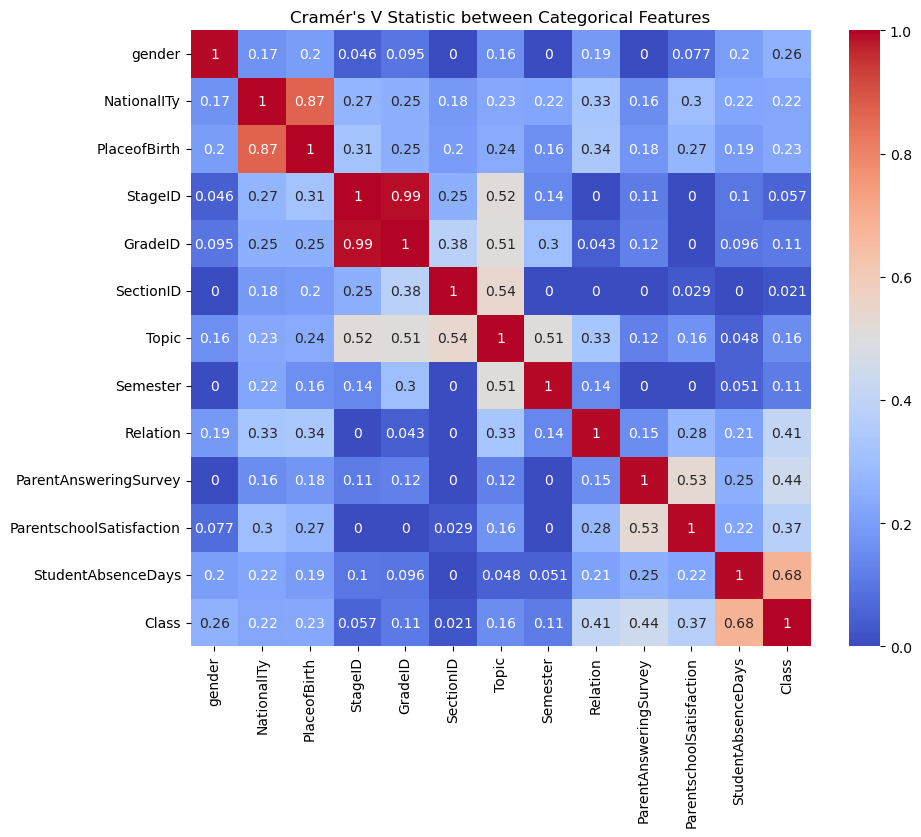

In [30]:
# Calculate Cramér's V statistic
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

categorical_features = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 
                        'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 
                        'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

plt.figure(figsize=(10, 8))
cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)
for i in range(len(categorical_features)):
    for j in range(len(categorical_features)):
        cramers_v_matrix.iloc[i, j] = cramers_v(df[categorical_features[i]], df[categorical_features[j]])

# Convert values in the Cramér's V matrix to float
cramers_v_matrix = cramers_v_matrix.astype(float)

sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm")
plt.title("Cramér's V Statistic between Categorical Features")
plt.show()

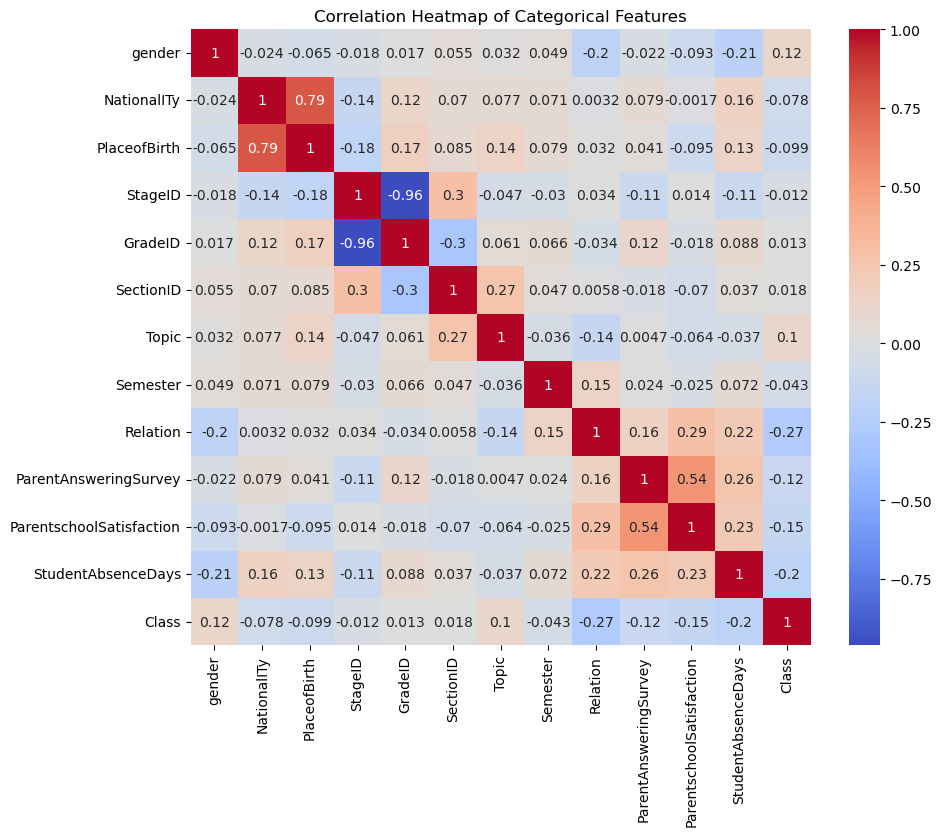

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[categorical_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Categorical Features")
plt.show()

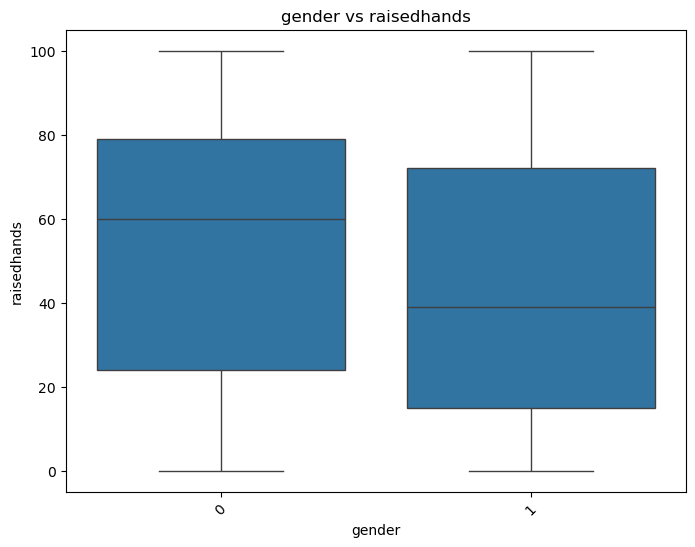

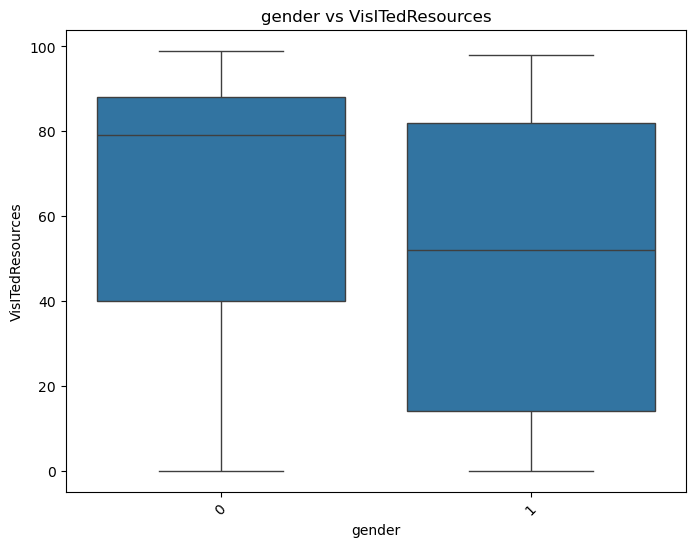

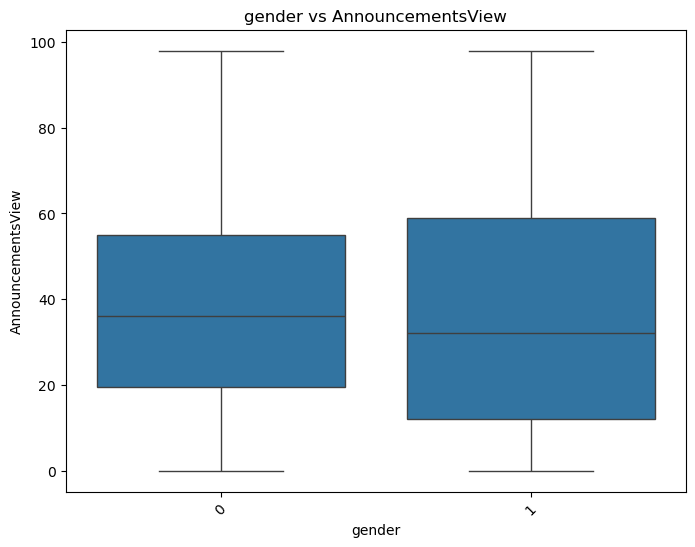

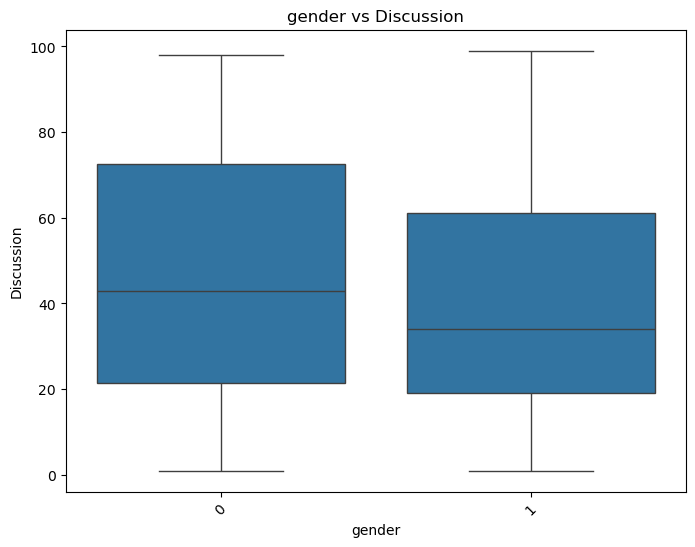

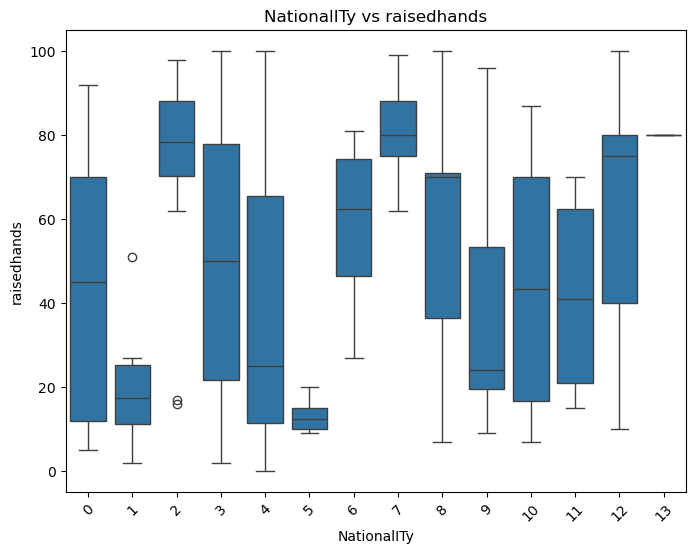

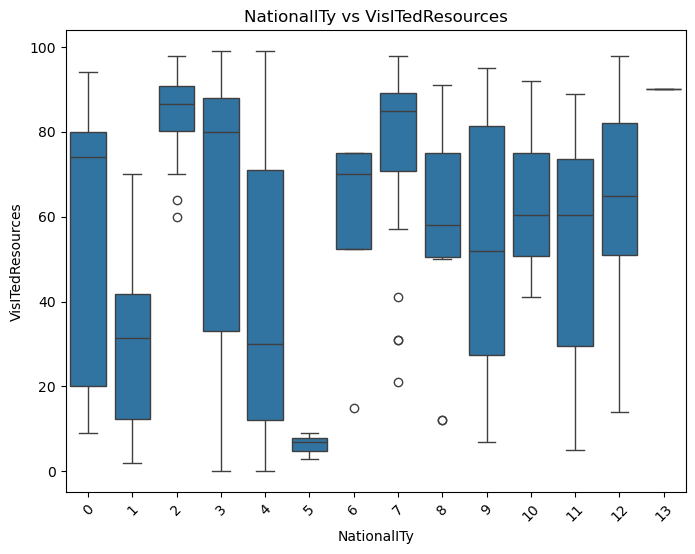

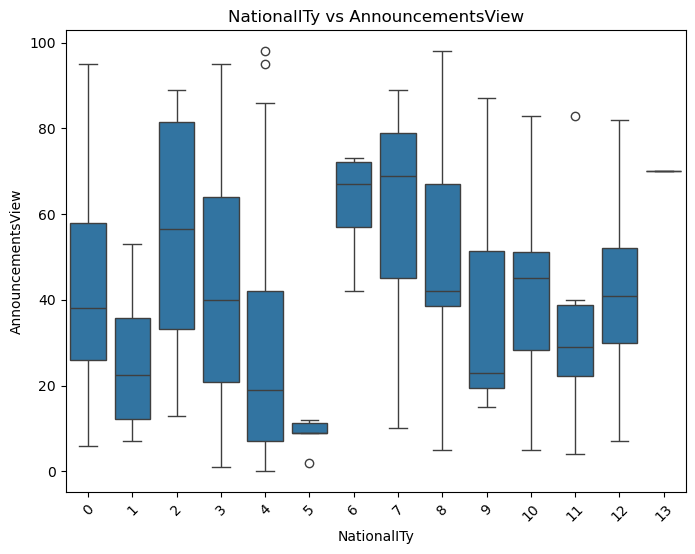

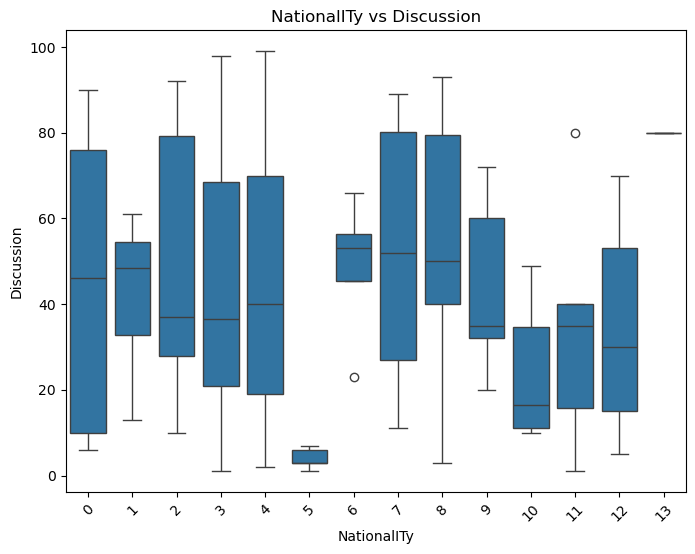

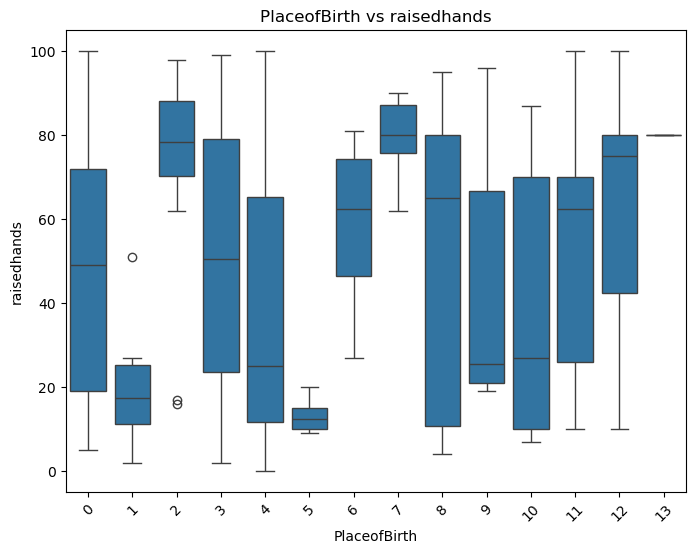

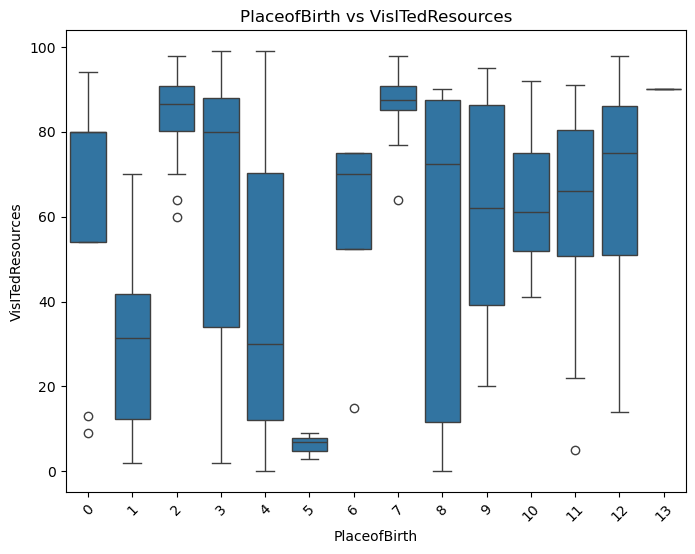

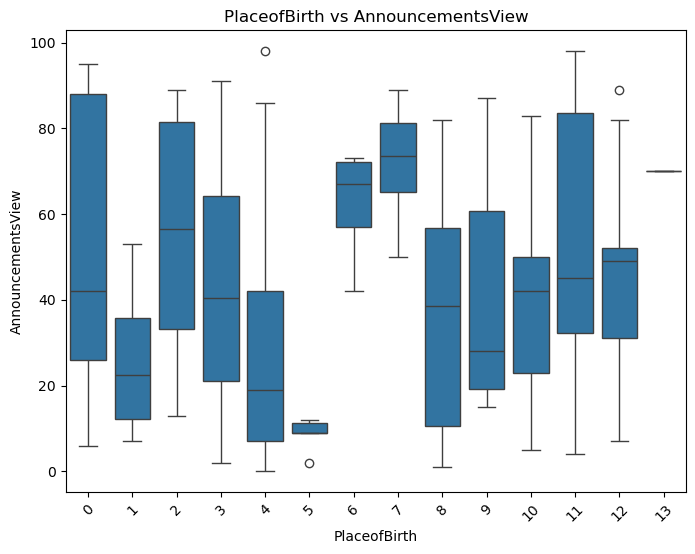

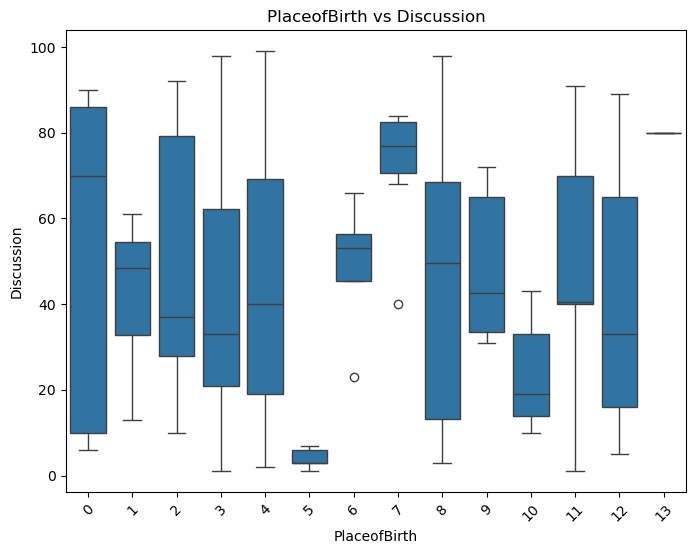

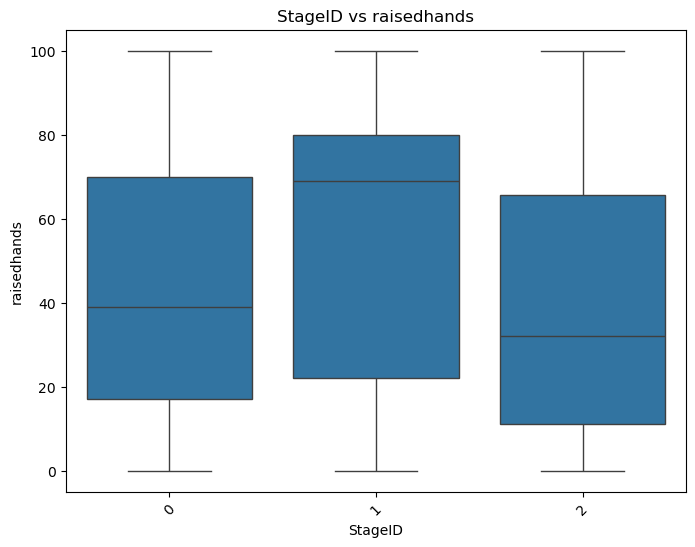

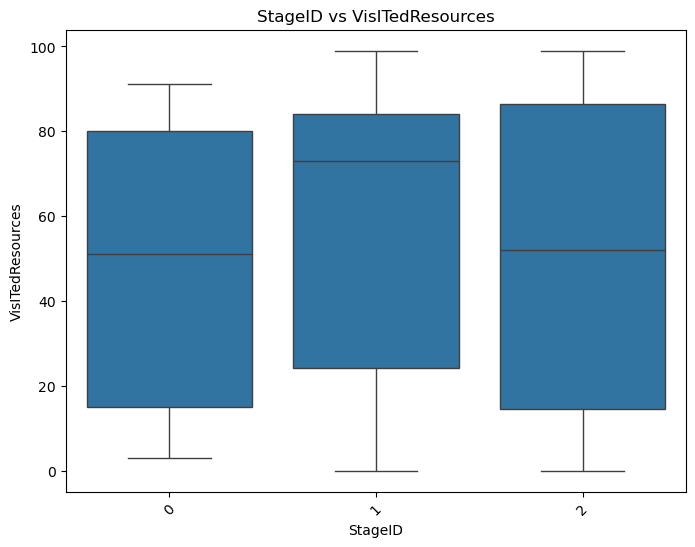

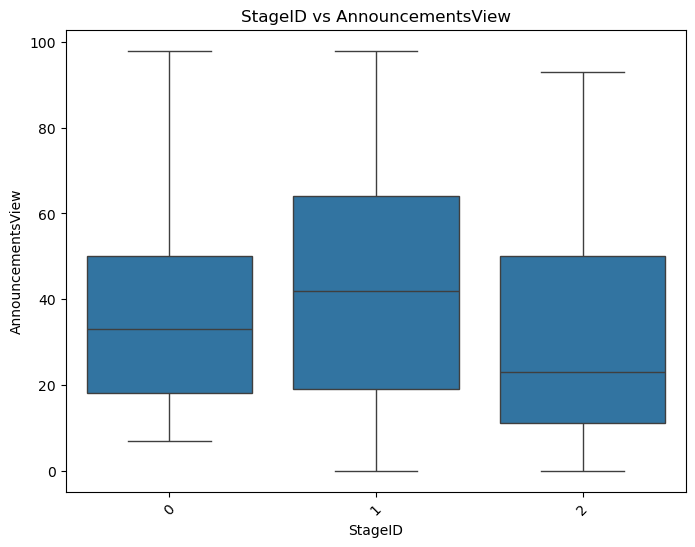

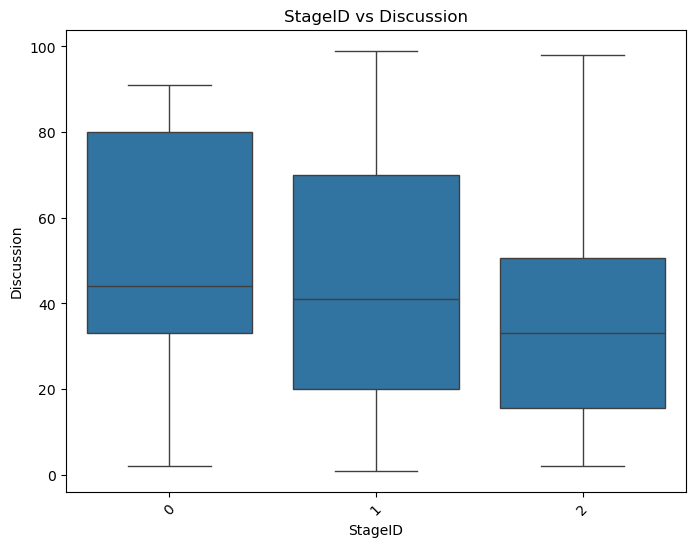

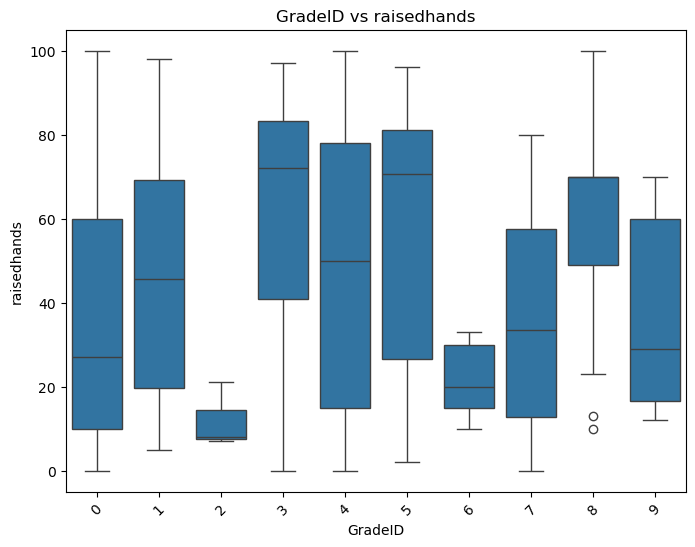

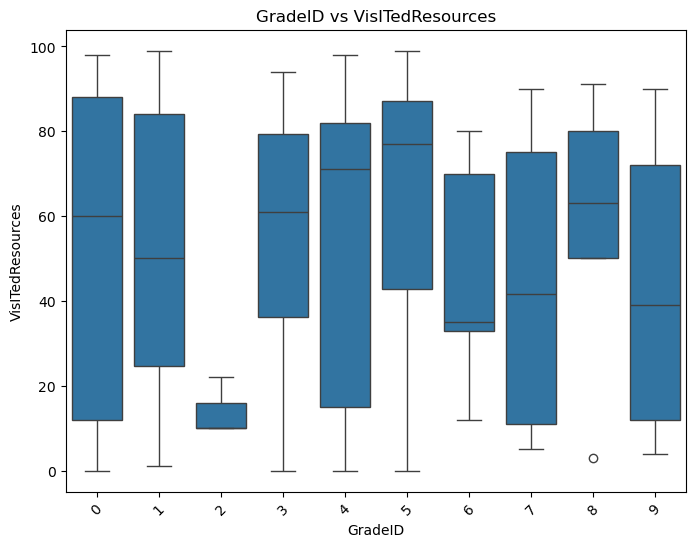

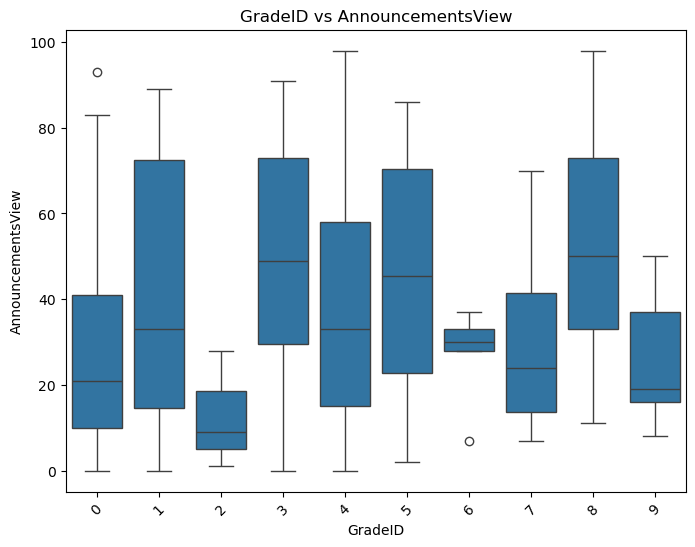

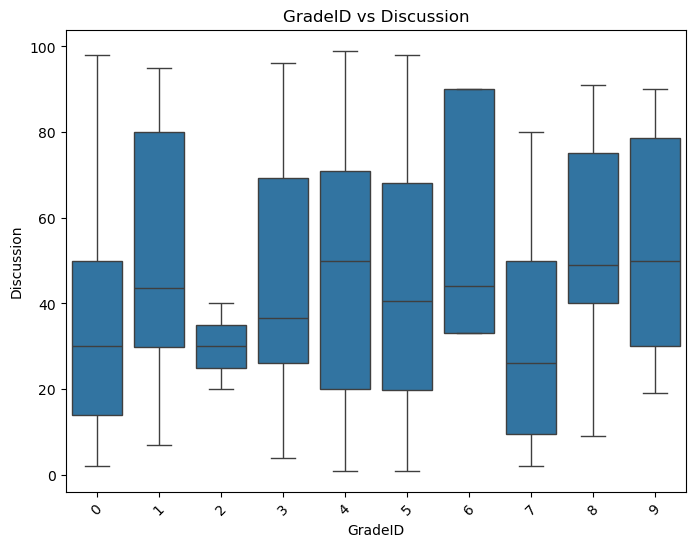

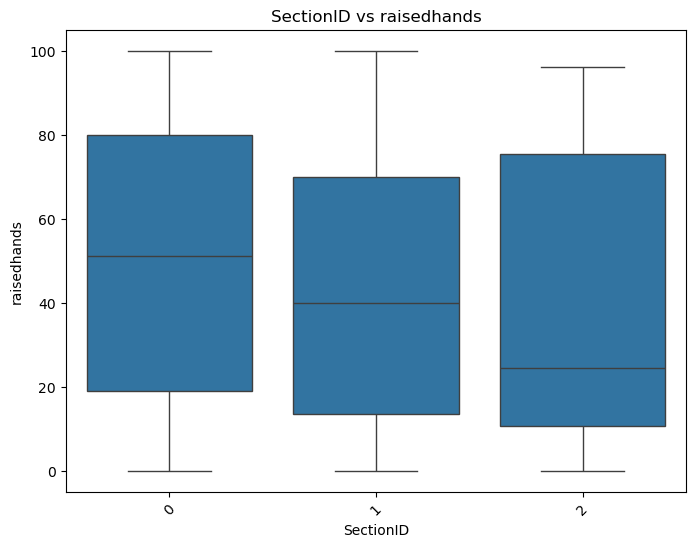

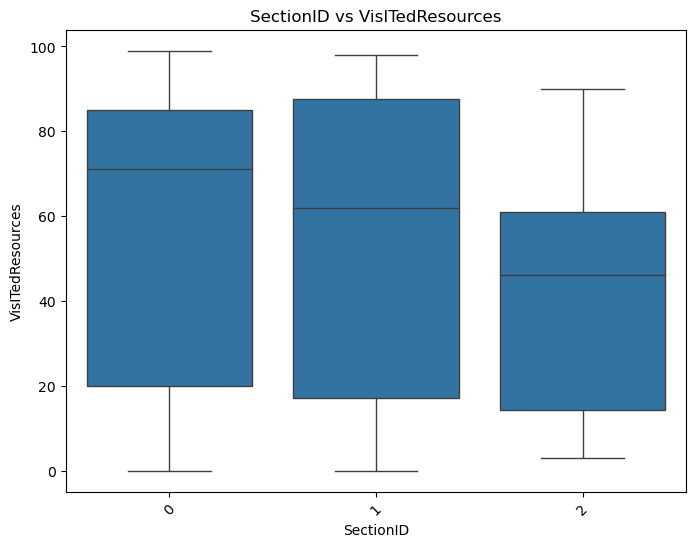

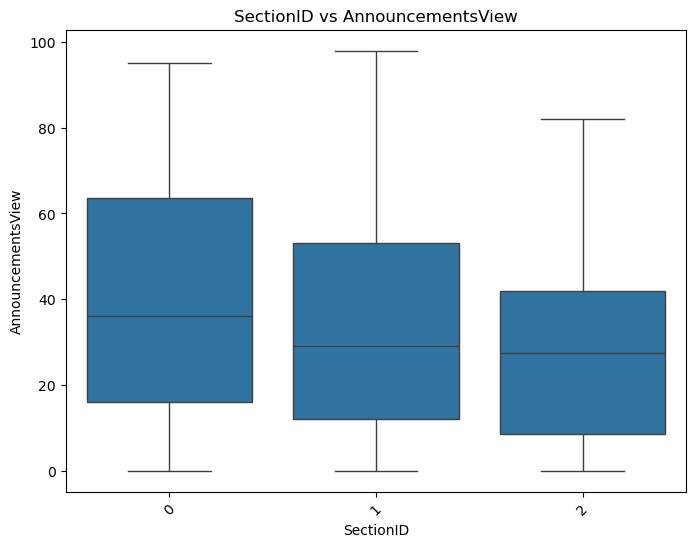

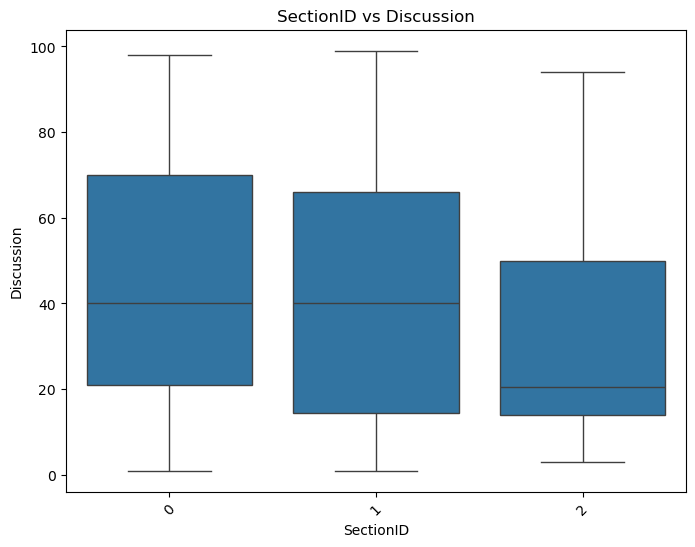

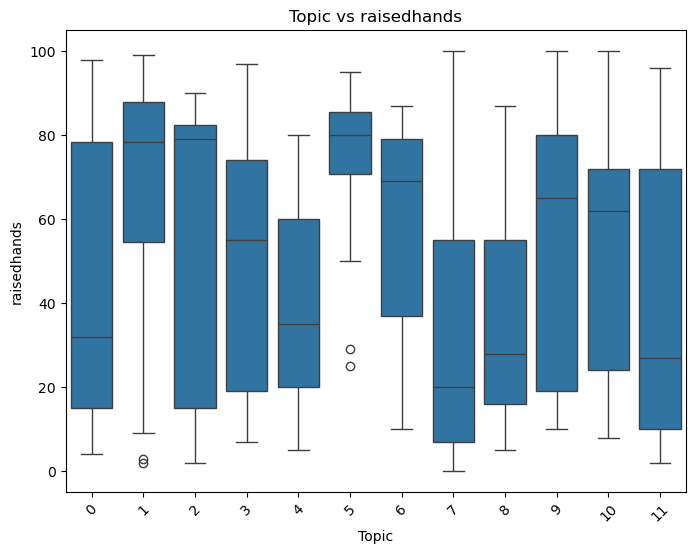

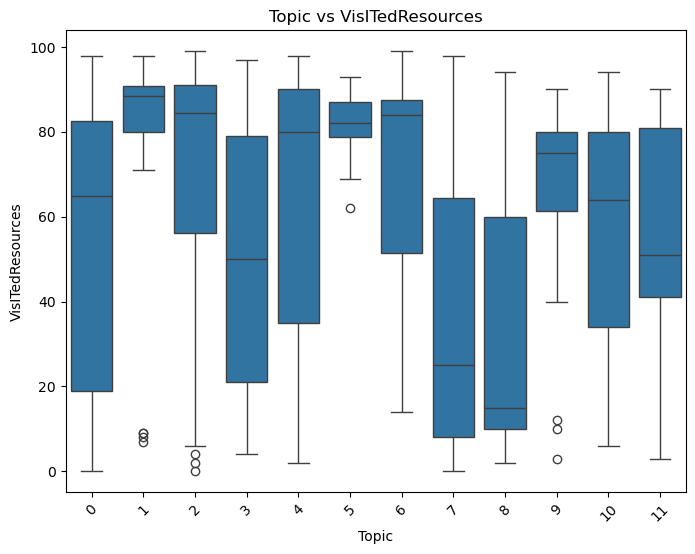

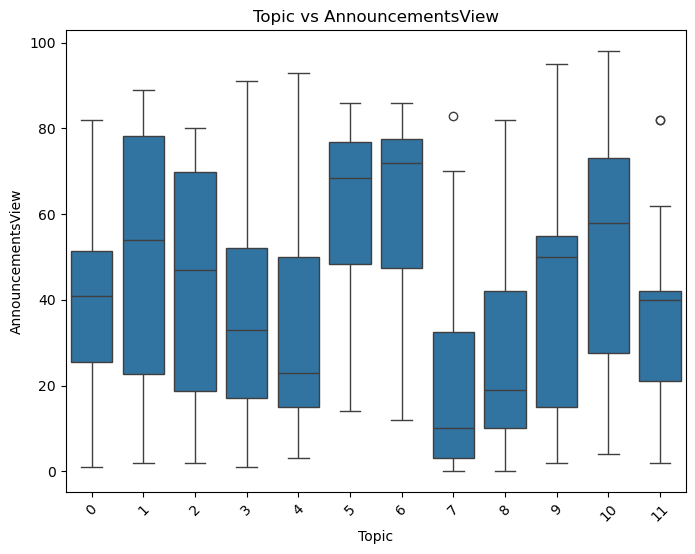

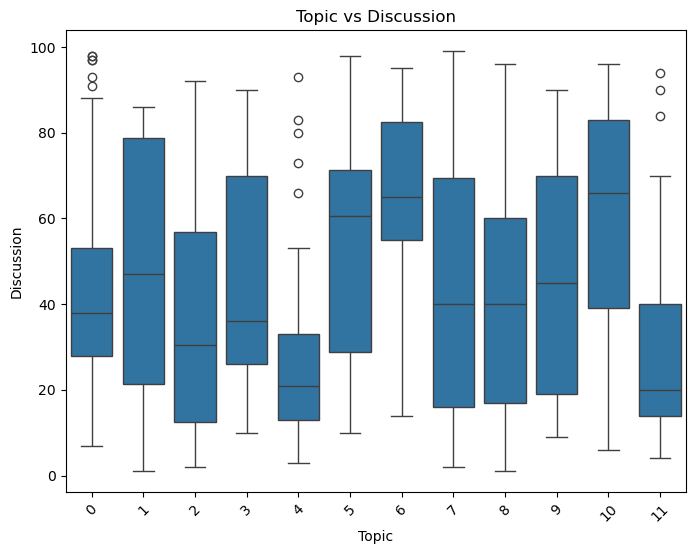

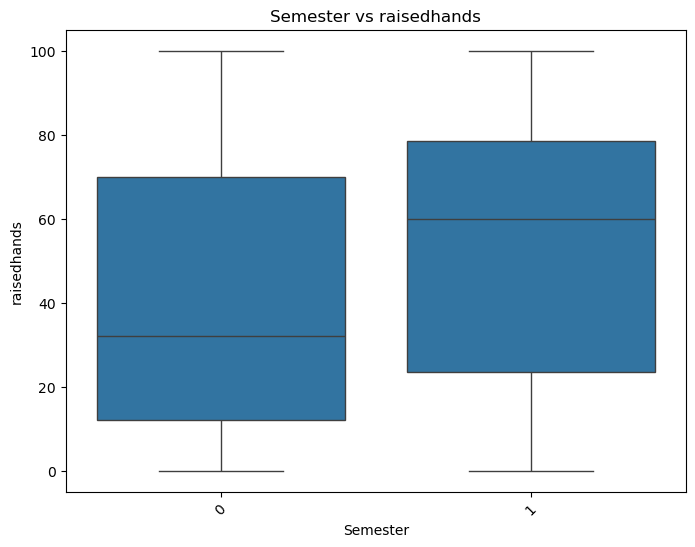

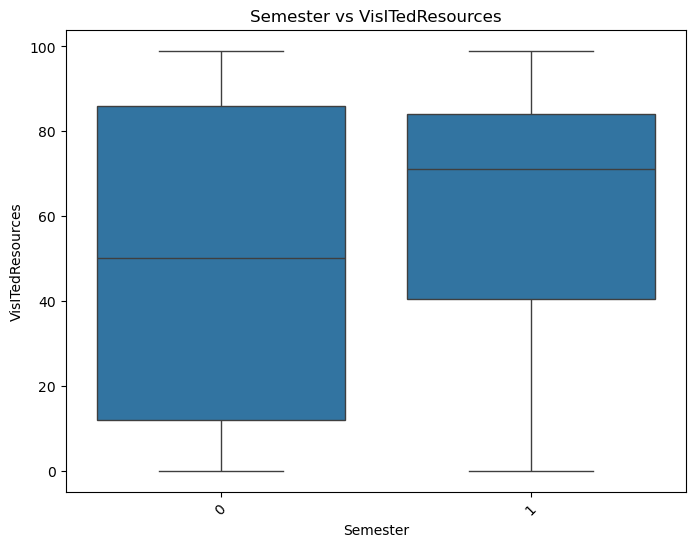

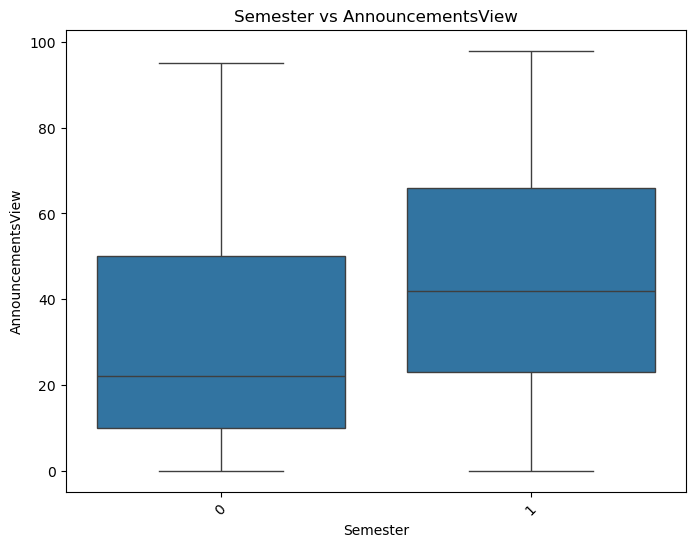

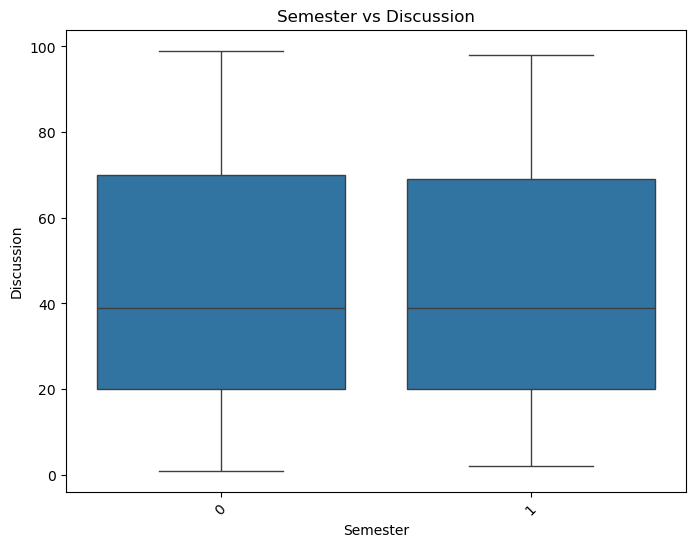

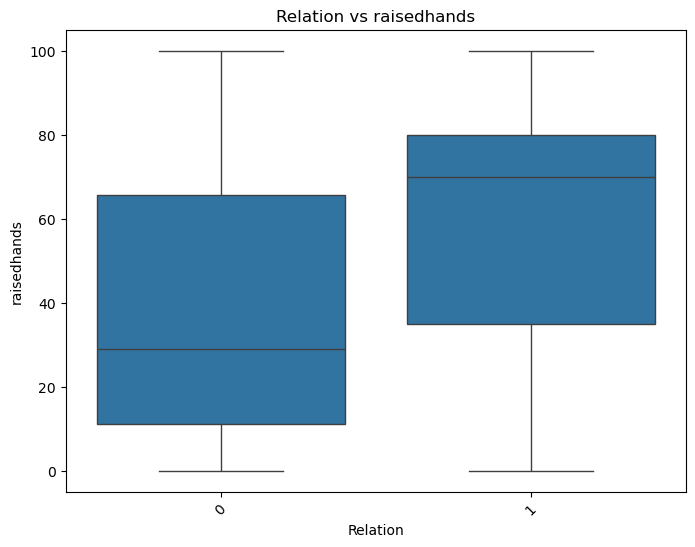

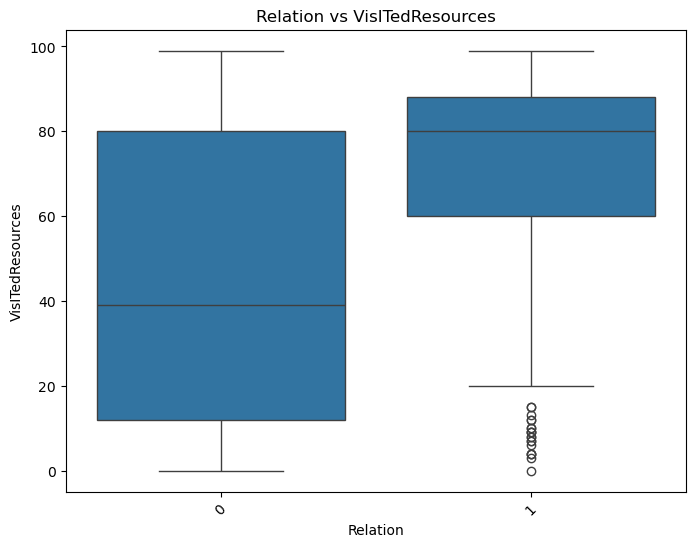

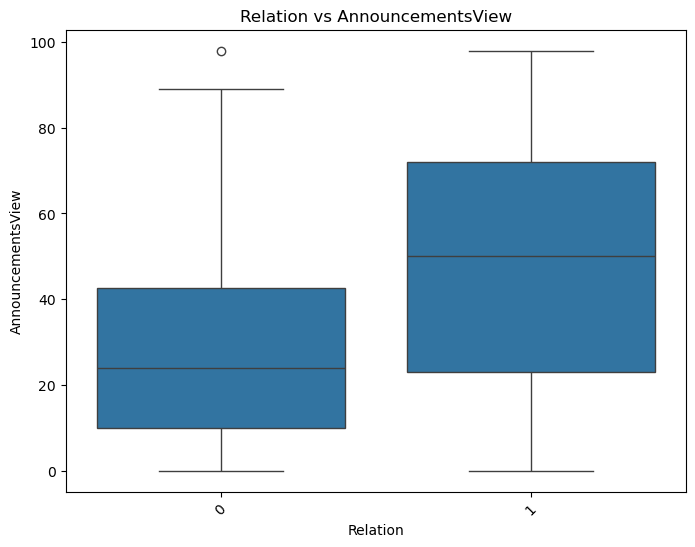

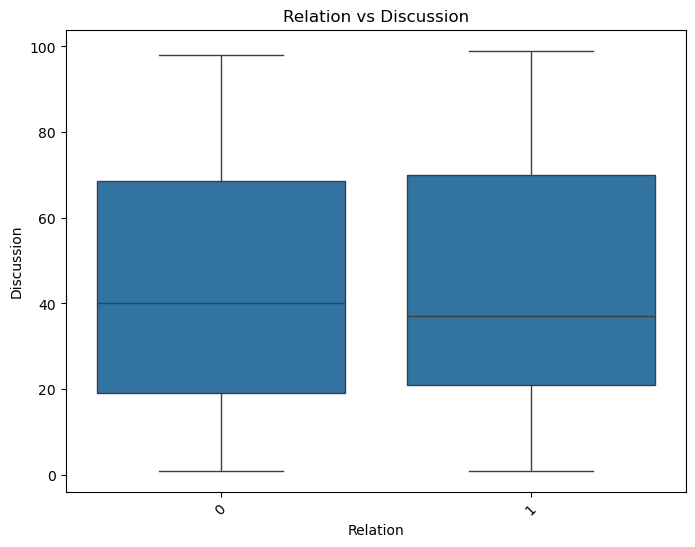

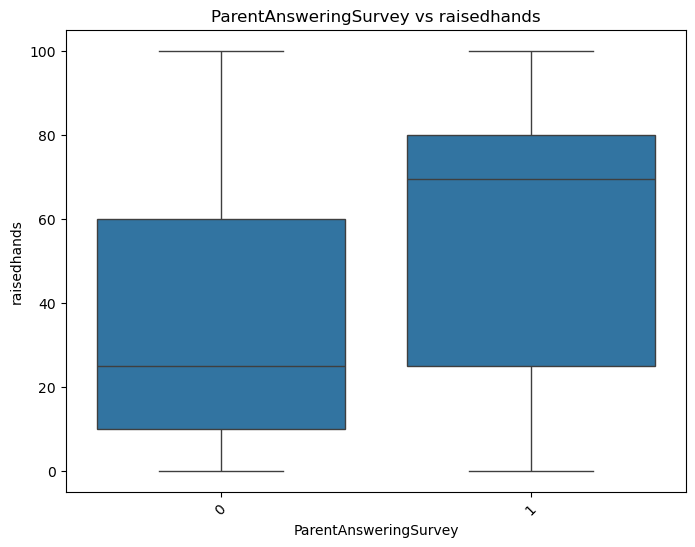

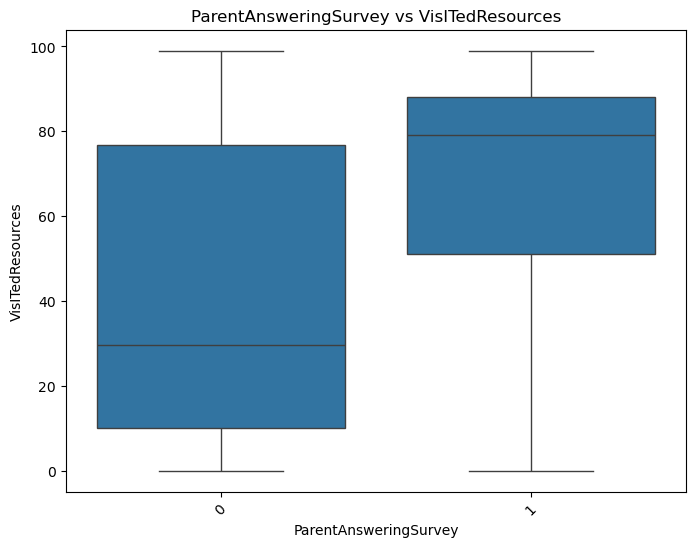

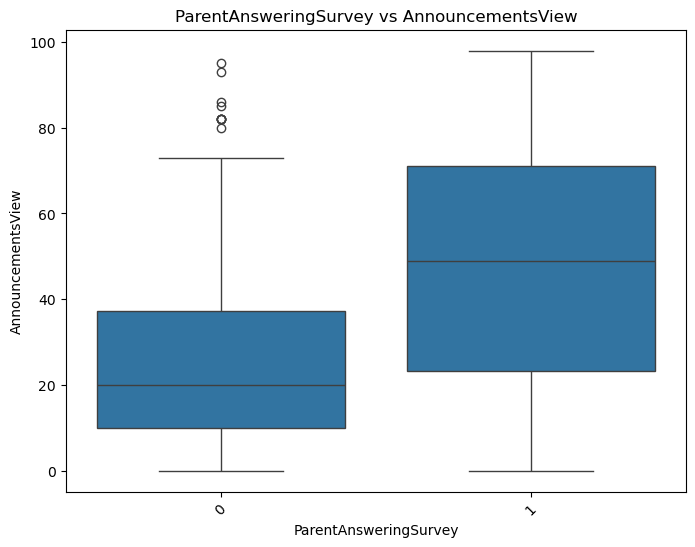

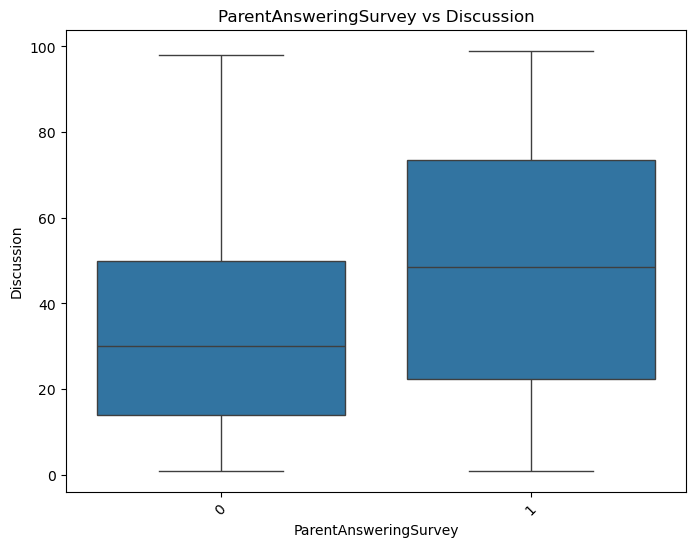

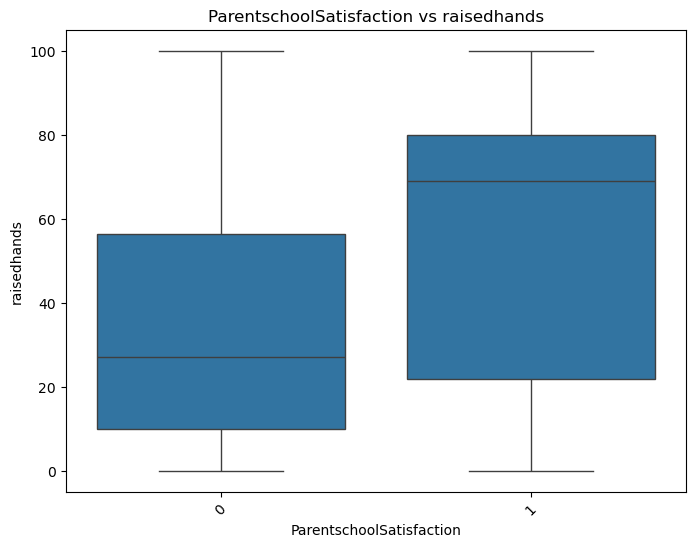

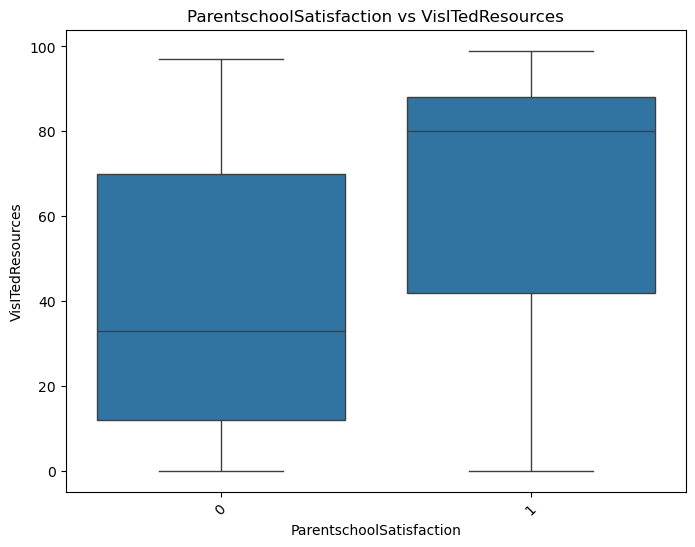

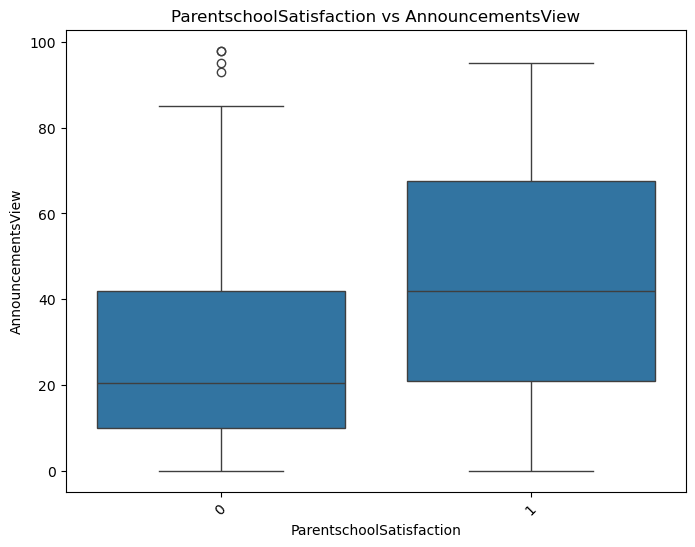

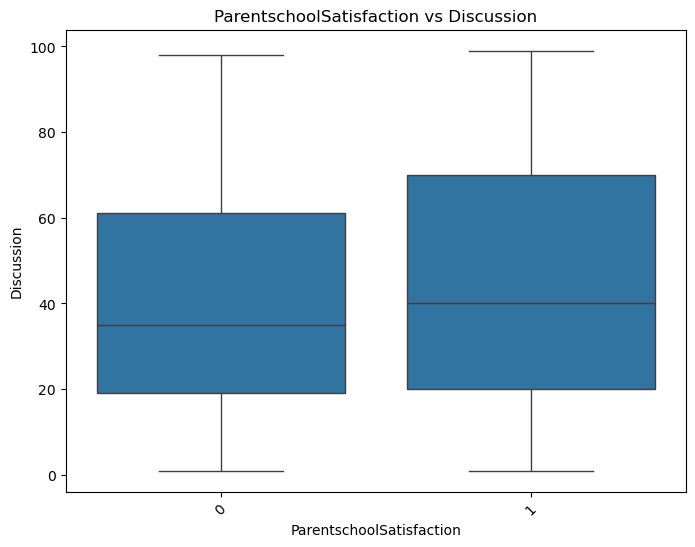

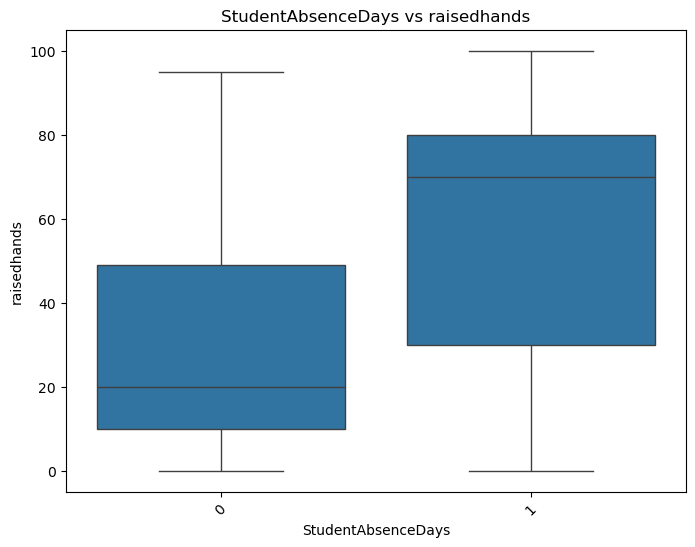

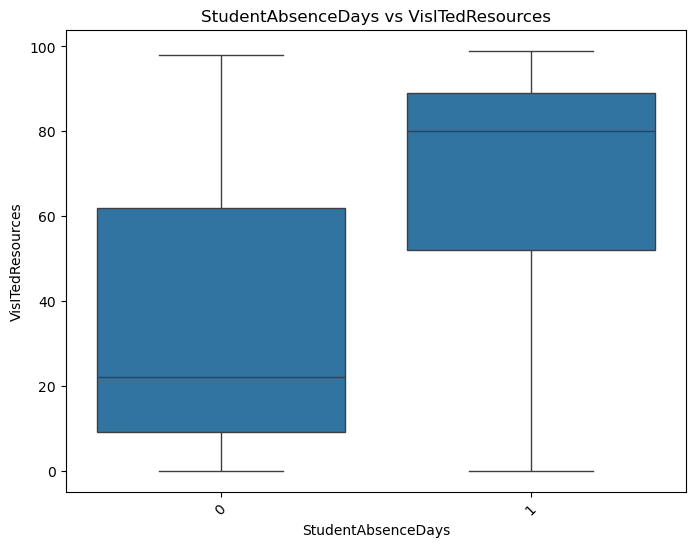

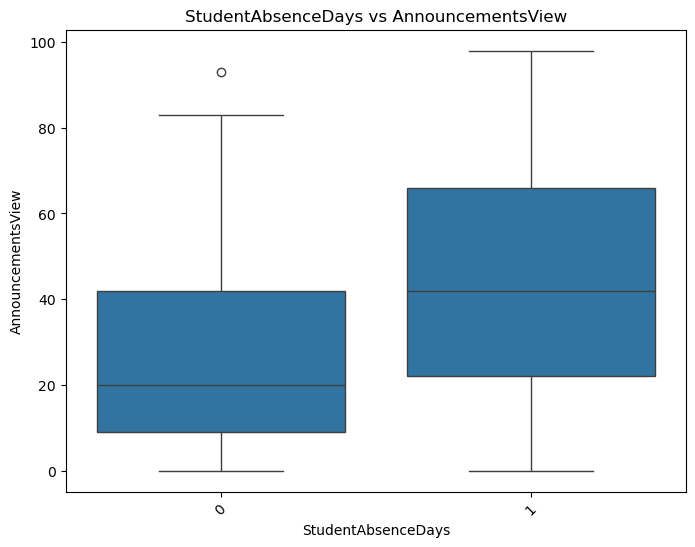

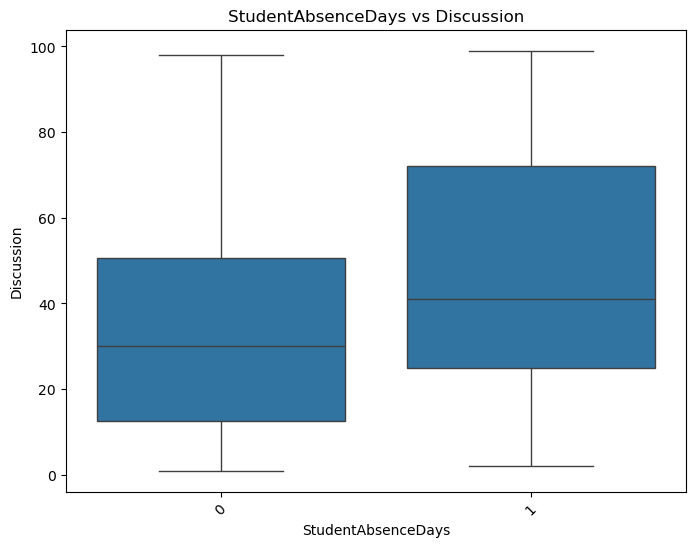

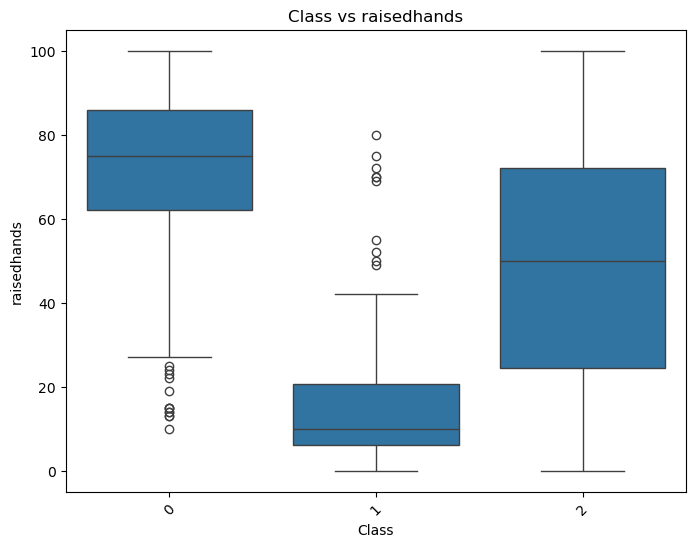

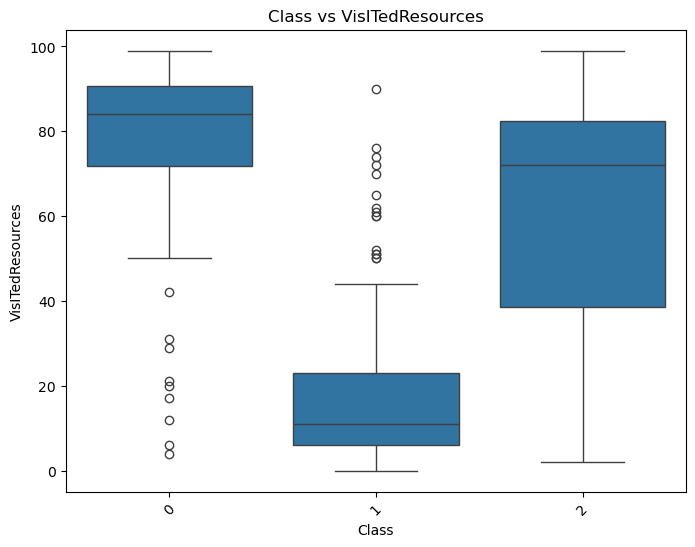

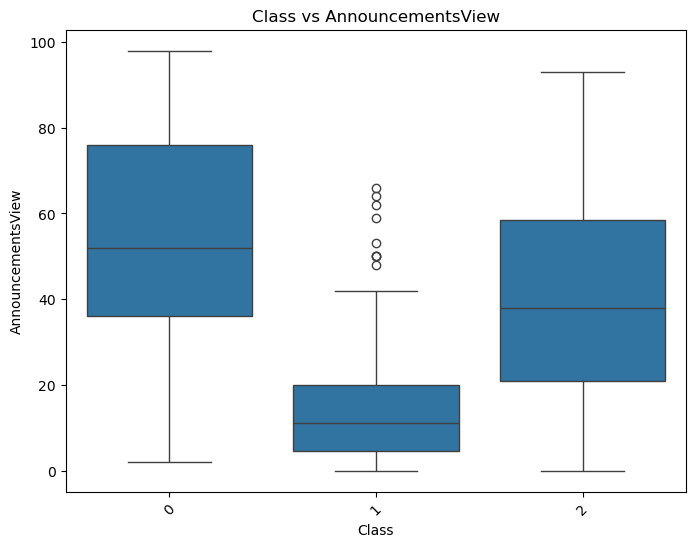

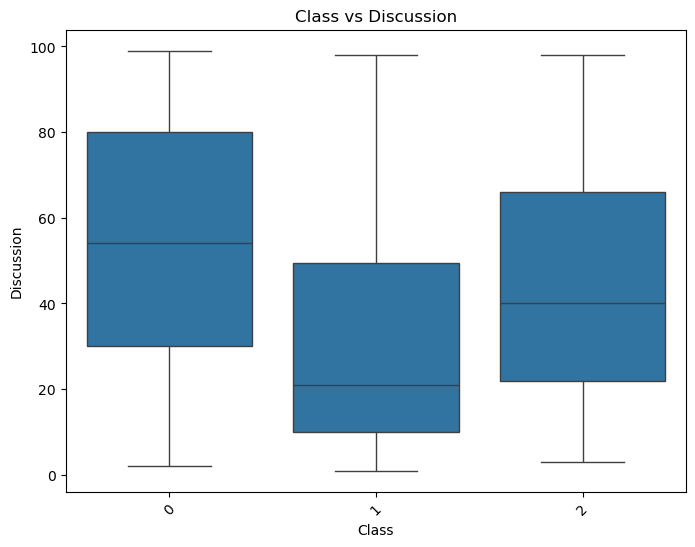

In [32]:
# Q.3 Visualize categorical variables with numerical variables
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for cat_feature in categorical_features:
    for num_feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=cat_feature, y=num_feature, data=df)
        plt.title(f"{cat_feature} vs {num_feature}")
        plt.xticks(rotation=45)
        plt.show()

In [12]:
# Q.4 Factors leading to low grades
# Assuming 'grades' is the target variable
# You can perform statistical tests or feature importance analysis to identify factors leading to low grades


In [33]:
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Assuming 'Class' is the target variable
target_variable = 'Class'


In [36]:
# Assuming other columns are features
features = df.drop(columns=[target_variable])

In [37]:
# Q.4 Factors leading to low grades: Statistical Tests
# Chi-square test for independence between categorical features and the target variable
def chi2_test_for_independence(feature, target):
    contingency_table = pd.crosstab(feature, target)
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    return p_val


In [38]:
# Perform chi-square test for independence for each categorical feature
categorical_features = features.select_dtypes(include=['object']).columns
p_values = {}
for feature in categorical_features:
    p_values[feature] = chi2_test_for_independence(features[feature], data[target_variable])


In [39]:
# Print p-values
print("Chi-square test p-values for categorical features:")
for feature, p_val in p_values.items():
    print(f"{feature}: {p_val}")

Chi-square test p-values for categorical features:


In [41]:
# Q.4 Factors leading to low grades: Feature Importance Analysis
# Random Forest Classifier for feature importance analysis
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(features, df[target_variable])

# Feature importance
feature_importance = pd.Series(rf_classifier.feature_importances_, index=features.columns).sort_values(ascending=False)

# Print feature importance
print("\nFeature importance:")
print(feature_importance)


Feature importance:
VisITedResources            0.190262
raisedhands                 0.161012
StudentAbsenceDays          0.129420
AnnouncementsView           0.115495
Discussion                  0.088207
Topic                       0.044422
Relation                    0.041710
ParentAnsweringSurvey       0.038147
GradeID                     0.036591
NationalITy                 0.035707
PlaceofBirth                0.032777
ParentschoolSatisfaction    0.022664
gender                      0.021299
SectionID                   0.017191
StageID                     0.015077
Semester                    0.010020
dtype: float64


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [43]:
# Q.5 Build classification model
# Preprocess the data
X = df.drop(columns=['Class'])
X = pd.get_dummies(X)  # One-hot encode categorical variables
y = df['Class']

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        22
           1       0.81      0.96      0.88        26
           2       0.76      0.58      0.66        48

    accuracy                           0.70        96
   macro avg       0.69      0.73      0.70        96
weighted avg       0.71      0.70      0.70        96

